In [141]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [233]:
import matplotlib as plt
import seaborn as sns

In [234]:
df = pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')

In [235]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [237]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [238]:
df.duplicated().sum()

0

In [239]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [240]:
df.shape

(51717, 17)

In [241]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [242]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [243]:
df.drop(['url','address','phone','dish_liked','reviews_list','menu_item'],axis = 1,inplace = True)

In [244]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


## Duplicates

In [246]:
df.drop_duplicates(inplace = True)
df.shape

(51609, 11)

## null

In [247]:
df['online_order'].unique

<bound method Series.unique of 0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715     No
51716     No
Name: online_order, Length: 51609, dtype: object>

In [248]:
df['online_order'].isnull().sum()

0

In [249]:
df['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [250]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [251]:
df['rate'] = df['rate'].str.split('/').str[0]

In [252]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [253]:
df['rate'] = df['rate'].replace('-',np.nan)
df['rate'] = df['rate'].replace('NEW',np.nan)

In [254]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [255]:
df['rate'].isnull().sum()

10019

In [256]:
df['rate'].head(100)

0     4.1
1     4.1
2     3.8
3     3.7
4     3.8
     ... 
95    3.3
96    3.8
97    3.7
98    3.7
99    3.8
Name: rate, Length: 100, dtype: object

In [257]:
df['rate'] = df['rate'].astype(float)

In [258]:
df['rate'] = df['rate'].fillna(df['rate'].mean())

In [259]:
df['rate'].isnull().sum()

0

In [260]:
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


## Votes Column

In [262]:
df['votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843])

In [263]:
df['votes'].isnull().sum()

0

## Location Column

In [264]:
df['location'].head()

0    Banashankari
1    Banashankari
2    Banashankari
3    Banashankari
4    Basavanagudi
Name: location, dtype: object

In [265]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [266]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [267]:
df.drop('listed_in(city)',axis=1,inplace = True)

In [268]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


In [269]:
df.rename(columns = {'approx_cost(for two people)':'Cost_2_plates', 'listed_in(type)':'Type'}, inplace = True)

In [270]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_2_plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [271]:
df['Cost_2_plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [272]:
df['Cost_2_plates'] = df['Cost_2_plates'].str.replace(',','')

In [273]:
df['Cost_2_plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', nan, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [274]:
df['Cost_2_plates'].isnull().sum()

344

In [275]:
df.isnull().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
location          21
rest_type        227
cuisines          45
Cost_2_plates    344
Type               0
dtype: int64

In [276]:
df.dropna(inplace = True)

In [277]:
df.isnull().sum()

name             0
online_order     0
book_table       0
rate             0
votes            0
location         0
rest_type        0
cuisines         0
Cost_2_plates    0
Type             0
dtype: int64

In [278]:
df['Cost_2_plates'] = df['Cost_2_plates'].astype(int)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           51042 non-null  object 
 1   online_order   51042 non-null  object 
 2   book_table     51042 non-null  object 
 3   rate           51042 non-null  float64
 4   votes          51042 non-null  int64  
 5   location       51042 non-null  object 
 6   rest_type      51042 non-null  object 
 7   cuisines       51042 non-null  object 
 8   Cost_2_plates  51042 non-null  int64  
 9   Type           51042 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 4.3+ MB


In [280]:
df['Type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [281]:
cuisines = df['cuisines'].value_counts()

In [282]:
cuisinelessthan100 = cuisines[cuisines<100]

def Sorted_Cuisine(value):
    if (value in cuisinelessthan100):
        return 'others'
    else:
        return value


In [283]:
df['cuisines'] = df['cuisines'].apply(Sorted_Cuisine)

In [284]:
df['cuisines'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [285]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_2_plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


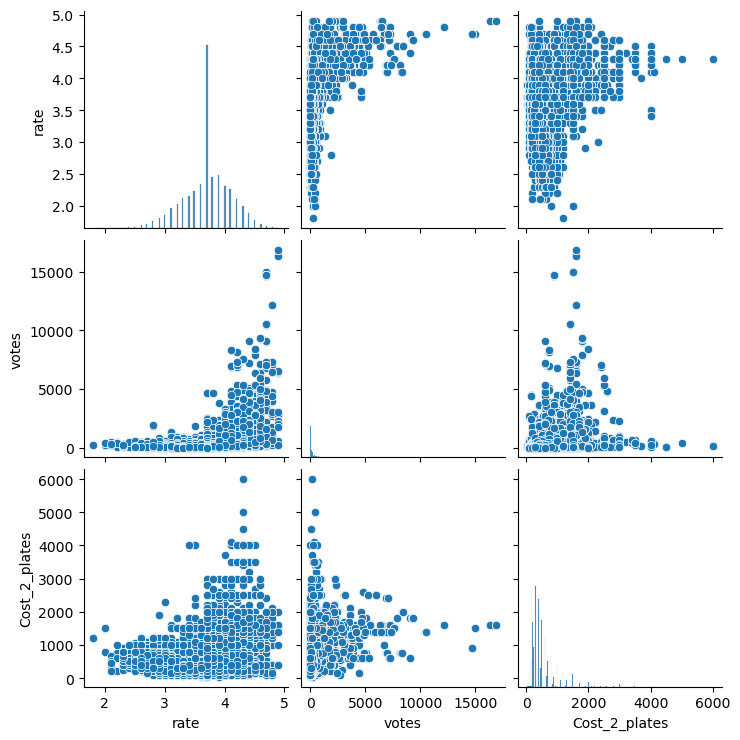

In [286]:
sns.pairplot(df)

In [290]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order         No   Yes
location                     
BTM                1763  3293
Banashankari        397   505
Banaswadi           302   338
Bannerghatta Road   685   924
Basavanagudi        243   441
...                 ...   ...
West Bangalore        4     2
Whitefield          986  1119
Wilson Garden       112   134
Yelahanka             0     5
Yeshwantpur          26    93

[93 rows x 2 columns]

<AxesSubplot:xlabel='location'>

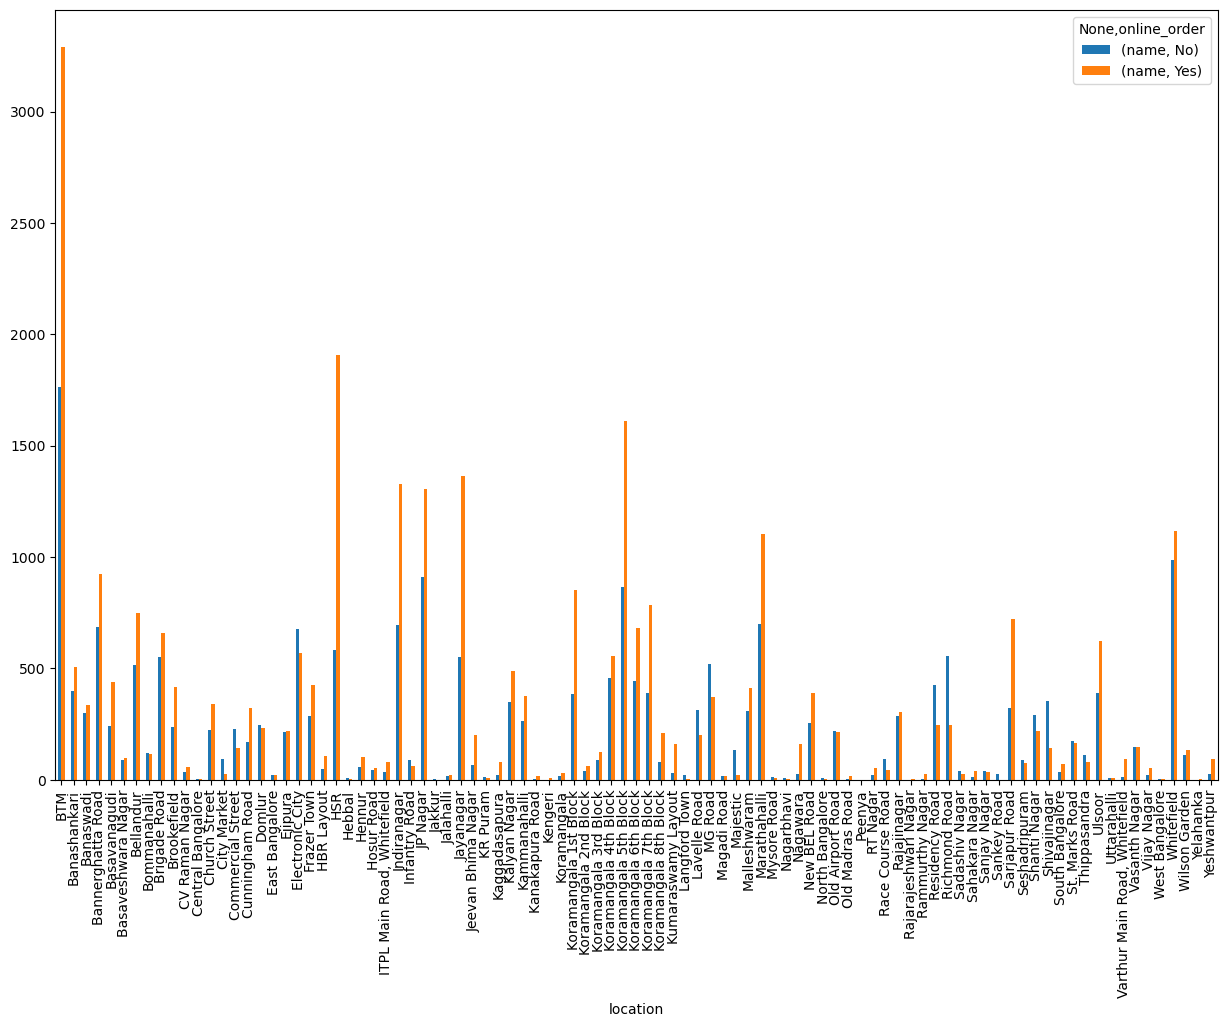

In [292]:
df1.plot(kind = 'bar', figsize = (15,10))